### Import Necessary Libraries

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import datetime as dt

### Data loading and proprocessing

In [25]:
# df = pd.read_csv('Sales Transaction v.4a.csv')
# df.head()

In [26]:
# df.shape

In [27]:
# df.info()

In [28]:
# dateFormat = '%m/%d/%Y'
# df['Date'] = pd.to_datetime(df['Date'],format = dateFormat)
# df.info()

In [29]:
# Create New Columns : TotalMoney
# df['TotalMoney'] = df['Price'] * df['Quantity']

# # Create New Columns : Month
# df['Month'] = pd.DatetimeIndex(df['Date']).month

# # Create New Columns : Year
# df['Year'] = pd.DatetimeIndex(df['Date']).year

# df.head()

In [30]:
# Check Null Value 
# df.isnull().sum() 

There are some CustomerNos missing so lets first check if CustomerNo is unique or just randomly assigned. If the customers are reused i.e. they use the same CustomerNos every month or in any interval it is not important.

In [31]:
# sns.histplot(df['CustomerNo'], kde=True)
# plt.figure(figsize=(12,8))
# plt.show()

# min_customer = df['CustomerNo'].min()
# max_customer = df['CustomerNo'].max()
# print(f"CustomerNo range: {min_customer} to {max_customer}")

# unique_customers = df['CustomerNo'].nunique()
# print(f"Unique Customer Numbers: {unique_customers}")

# all_customers = set(range(12000, 18001))  # inclusive
# actual_customers = set(df['CustomerNo'].unique())

# missing_customers = all_customers - actual_customers
# print(f"Missing customer numbers: {sorted(missing_customers)}")
# print(f"Count of missing numbers: {len(missing_customers)}")

In [32]:
# country_counts = df.groupby('CustomerNo')['Country'].nunique()
# suspicious_customers = country_counts[country_counts > 1]
# if len(suspicious_customers) == 0:
#     print("Each CustomerNo is associated with only one Country.")
# else:
#     print("Some CustomerNo values are associated with multiple Countries.")
#     print(suspicious_customers)

In [33]:
# missing_cust_rows = df[df['CustomerNo'].isna()]
# transactions_with_missing = missing_cust_rows['TransactionNo'].unique()
# print(f"{len(transactions_with_missing)} transaction(s) with missing CustomerNo")

# multi_customer_transactions = []
# for txn in transactions_with_missing:
#     txn_rows = df[df['TransactionNo'] == txn]
#     if txn_rows['CustomerNo'].notna().any():
#         multi_customer_transactions.append(txn)

# if len(transactions_with_missing) == 1:
#     print("Missing CustomerNo occurs only in a single transaction.")
# elif len(multi_customer_transactions) == 0:
#     print("No transaction with missing CustomerNo also has a valid CustomerNo — they are entirely missing.")
# else:
#     print("Some transactions with missing CustomerNo also have valid CustomerNo in other rows:")
#     print(multi_customer_transactions)

In [34]:
# unique_countries = missing_cust_rows['Country'].dropna().unique()

# if len(unique_countries) == 1:
#     print(f"All missing CustomerNo transactions are from the same country: {unique_countries[0]}")
# else:
#     print(f"Missing CustomerNo transactions are from multiple countries: {unique_countries}")

In [35]:
# new_customer_ids = range(11500, 11636)
# txn_to_customer = dict(zip(transactions_with_missing, new_customer_ids))

# def fill_customer(row):
#     if pd.isna(row['CustomerNo']) and row['TransactionNo'] in txn_to_customer:
#         return txn_to_customer[row['TransactionNo']]
#     else:
#         return row['CustomerNo']

# df['CustomerNo'] = df.apply(fill_customer, axis=1)

In [36]:
# df.isnull().sum()

In [37]:
# df['TransactionNo'] = df['TransactionNo'].astype(str).str.lstrip('C')
# df['TransactionNo'] = df['TransactionNo'].astype(str).str.lstrip('A')
# df['TransactionNo'] = df['TransactionNo'].astype(str).str.lstrip('B')

In [38]:
# Convert all Quantity values to positive
# df['Quantity'] = df['Quantity'].abs()

In [39]:
# df.to_csv("cleaned_sales_data.csv", index=False)

# EDA

In [40]:
df = pd.read_csv("cleaned_sales_data.csv")

In [41]:
# plt.figure(figsize=(10, 9))
# sns.scatterplot(data=df, x='CustomerNo', y='Country', hue='Country', palette='tab10', s=50)

# plt.title("CustomerNo usage by Country")
# plt.xlabel("CustomerNo")
# plt.ylabel("Country")
# plt.xticks(rotation=90)
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
# plt.tight_layout()
# plt.show()

From this plot we can see that CustomerNos are not reused and are helpful to identify our most valuable customer. We also see the distribution of our customer base across different countries.

## What are the most popular and money generating products? Also identify most valuable customers.

##### 10 Transactions With Highest Total Money

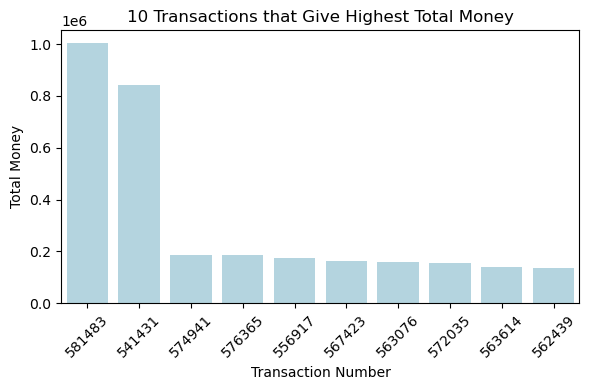

In [42]:
# listTransaction = df['TransactionNo'].unique()
# listTotalMoney = []

# # Loop for Store Data
# for i in listTransaction:
#     totalMoney = df['TotalMoney'].loc[df['TransactionNo'] == i].sum()
#     listTotalMoney.append(totalMoney)

# dictTransaction = {
#     'TransactionNo' : listTransaction,
#     'TotalMoney' : listTotalMoney
# }

# # Adjust DataFrame
# dfTransaction = pd.DataFrame(dictTransaction)
# dfTransaction = dfTransaction.sort_values('TotalMoney', ascending=False).head(10)
# dfTransaction = dfTransaction.reset_index(drop=True)
# dfTransaction.to_csv("TrasactionMoney.csv", index=False)
dfTransaction = pd.read_csv("top_10_transactions.csv")
dfTransaction = dfTransaction.sort_values("TotalMoney", ascending=False)

dfTransaction["TransactionNo"] = pd.Categorical(
    dfTransaction["TransactionNo"],
    categories=dfTransaction["TransactionNo"],
    ordered=True
)

plt.figure(figsize=(6, 4))
sns.barplot(data=dfTransaction, x='TransactionNo', y='TotalMoney', color="lightblue")
plt.title('10 Transactions that Give Highest Total Money')
plt.xticks(rotation=45)
plt.xlabel('Transaction Number')
plt.ylabel('Total Money')
plt.tight_layout()
plt.show()


In [43]:
# Get the top two transaction numbers
top2_txn = dfTransaction['TransactionNo'][:2].to_list()
print(top2_txn)
products_top2 = df[df['TransactionNo'].isin(top2_txn)][['TransactionNo', 'ProductNo', 'ProductName', 'Price', 'Quantity', 'CustomerNo', 'Country', 'TotalMoney']]
products_top2

[581483, 541431]


,TransactionNo,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,TotalMoney
142,581483,23843,Paper Craft Little Birdie,12.38,80995,16446.0,United Kingdom,1002718.1
473985,541431,23166,Medium Ceramic Top Storage Jar,11.32,74215,12346.0,United Kingdom,840113.8


    ProductNo                          ProductName  Count
309     23207            Lunch Bag Alphabet Design      6
305     23203              Jumbo Bag Vintage Doily      6
303     23201                   Jumbo Bag Alphabet      6
159     22551             Plasters In Tin Spaceboy      5
152     22492               Mini Paint Set Vintage      5
66      21915                 Red Harmonica In Box      5
298     23192  Bundle Of 3 Alphabet Exercise Books      5
160     22554     Plasters In Tin Woodland Animals      4
183     22629                   Spaceboy Lunch Box      4
184     22630                 Dolly Girl Lunch Box      4


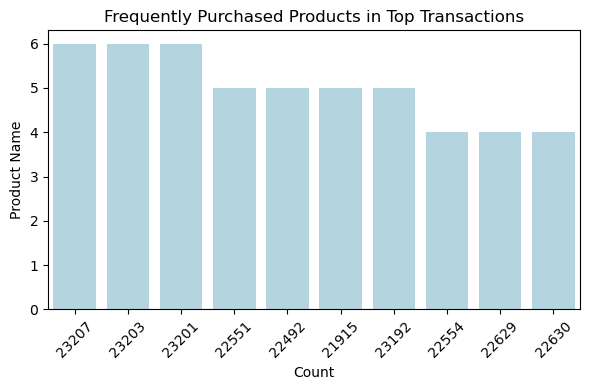

In [44]:
top_txn = dfTransaction['TransactionNo'].to_list()
products_top = df[df['TransactionNo'].isin(top_txn)][['TransactionNo', 'ProductNo', 'ProductName']]
product_counts = (
    products_top
    .groupby(['ProductNo', 'ProductName'])
    .size()
    .reset_index(name='Count')
    .sort_values('Count', ascending=False)
)
print(product_counts[:10])

# Plot count plot
plt.figure(figsize=(6, 4))
sns.barplot(data=product_counts[:10], x='ProductNo', y='Count', color='lightblue')
plt.title('Frequently Purchased Products in Top Transactions')
plt.xticks(rotation=45)
plt.xlabel('Count')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()

##### 10 Products that Give Highest Total Money

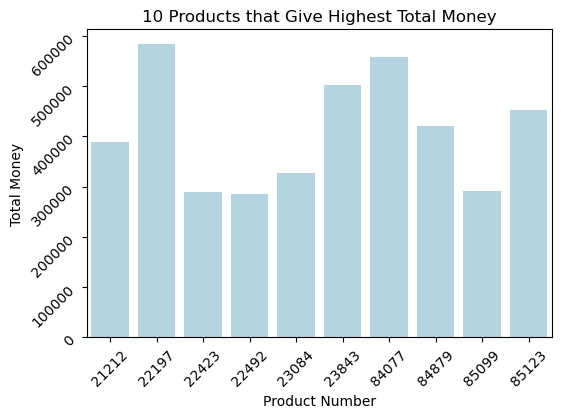

   ProductNo  TotalMoney                         ProductName
0      22197   583286.51                      Popcorn Holder
1      84077   557170.43   World War 2 Gliders Asstd Designs
2      23843   501359.05           Paper Craft Little Birdie
3      85123   451401.70  Cream Hanging Heart T-Light Holder
4      84879   420743.70       Assorted Colour Bird Ornament
5      21212   388424.61     Pack Of 72 Retrospot Cake Cases
6      23084   327794.21                  Rabbit Night Light
7      85099   290474.52             Jumbo Bag Red Retrospot
8      22423   289288.60            Regency Cakestand 3 Tier
9      22492   284870.92              Mini Paint Set Vintage


In [45]:
# # Variable to Store Data
# listProduct = df['ProductNo'].unique()
# listTotalMoney = []

# # Loop for Store Data
# for i in listProduct:
#     totalMoney = df['TotalMoney'].loc[df['ProductNo'] == i].sum()
#     listTotalMoney.append(totalMoney)

# # Dictionary for DataFrame
# dictProduct = {
#     'ProductNo' : listProduct,
#     'TotalMoney' : listTotalMoney
# }

# # Adjust DataFrame
# dfProduct = pd.DataFrame(dictProduct)
# dfProduct = dfProduct.sort_values('TotalMoney',ascending=False).head(10)
# dfProduct = dfProduct.reset_index(drop=True)

dfProduct = pd.read_csv("top_10_products.csv")
# Create Figure
plt.figure(figsize = (6,4))
sns.barplot(data = dfProduct, x = 'ProductNo',y = 'TotalMoney', color = 'lightblue')
plt.title('10 Products that Give Highest Total Money')
plt.yticks(rotation = 45)
plt.xticks(rotation = 45)
plt.xlabel('Product Number')
plt.ylabel('Total Money')
plt.show()
print(dfProduct)
# Show Product Number, Product Name and Total Money
# listProductName = []
# for i in dfProduct['ProductNo']:
#     a = df['ProductName'].loc[df['ProductNo'] == i].unique()[0]
#     listProductName.append(a) 
# dfProduct['ProductName'] = listProductName
# print(dfProduct)

##### 10 Products Price that Give Highest TOtal Money

In [46]:
plt.figure(figsize=(12,8))

listProductNo = dfProduct['ProductNo'].unique().copy()
listProductName = dfProduct['ProductName'].unique().copy()

for i in range(len(listProductNo)):
    pricePiece = round(df['Price'].loc[df['ProductNo']==listProductNo[i]].mean(),2)
    labelx = listProductNo[i]+' - '+listProductName[i]
    plt.text(labelx,pricePiece*1.05,pricePiece,ha='center')
    plt.bar(x = labelx, height = pricePiece)

plt.ylim(0,33)
plt.title('10 Products Price that Give Highest Total Money')
plt.xticks(rotation = 90)
plt.show()

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('int64'), dtype('<U3')) -> None

<Figure size 1200x800 with 0 Axes>

##### 10 Products Total Quantity that Give Highest Total Money

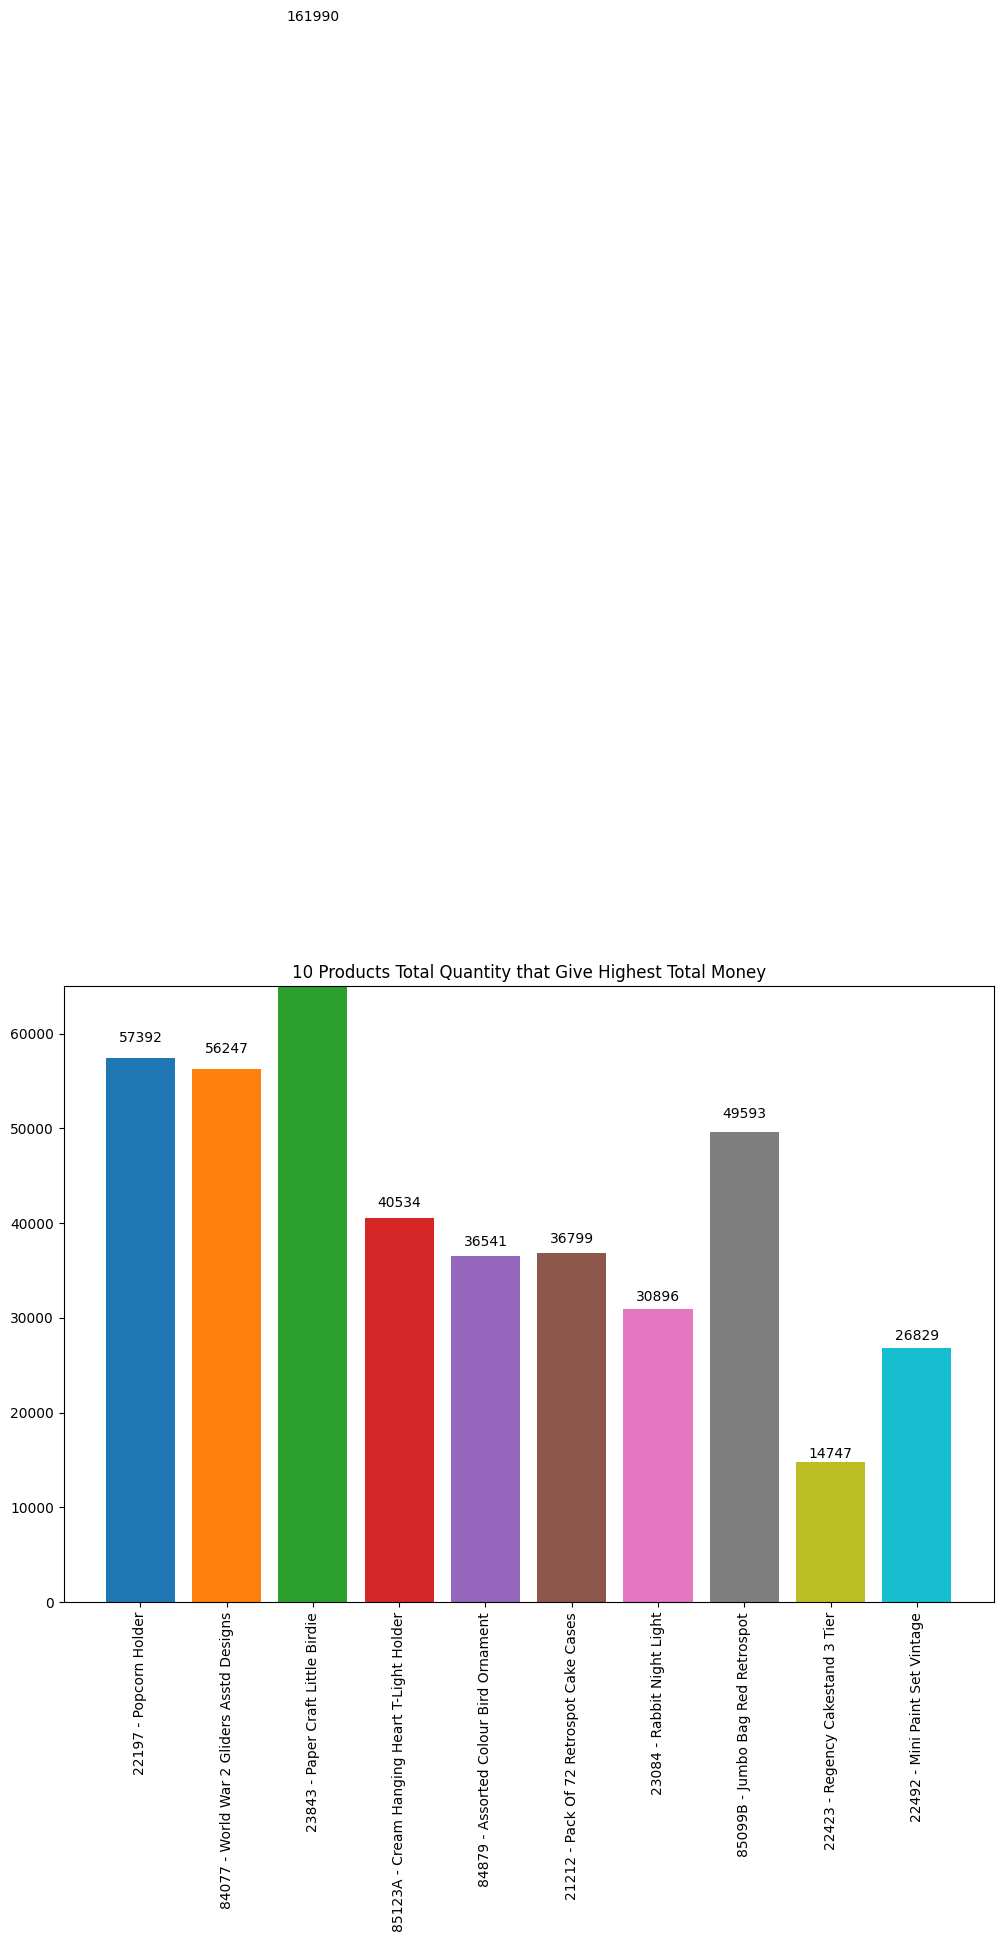

In [ ]:
plt.figure(figsize=(12,8))

listProductNo = dfProduct['ProductNo'].unique().copy()
listProductName = dfProduct['ProductName'].unique().copy()

for i in range(len(listProductNo)):
    totalQuantity = round(df['Quantity'].loc[df['ProductNo']==listProductNo[i]].sum(),2)
    labelx = listProductNo[i]+' - '+listProductName[i]
    plt.text(labelx,totalQuantity*1.03,totalQuantity,ha='center')
    plt.bar(x = labelx, height = totalQuantity)

plt.ylim(0,65000)
plt.title('10 Products Total Quantity that Give Highest Total Money')
plt.xticks(rotation = 90)
plt.show()

##### 10 Countries that GIve Total Highest Money

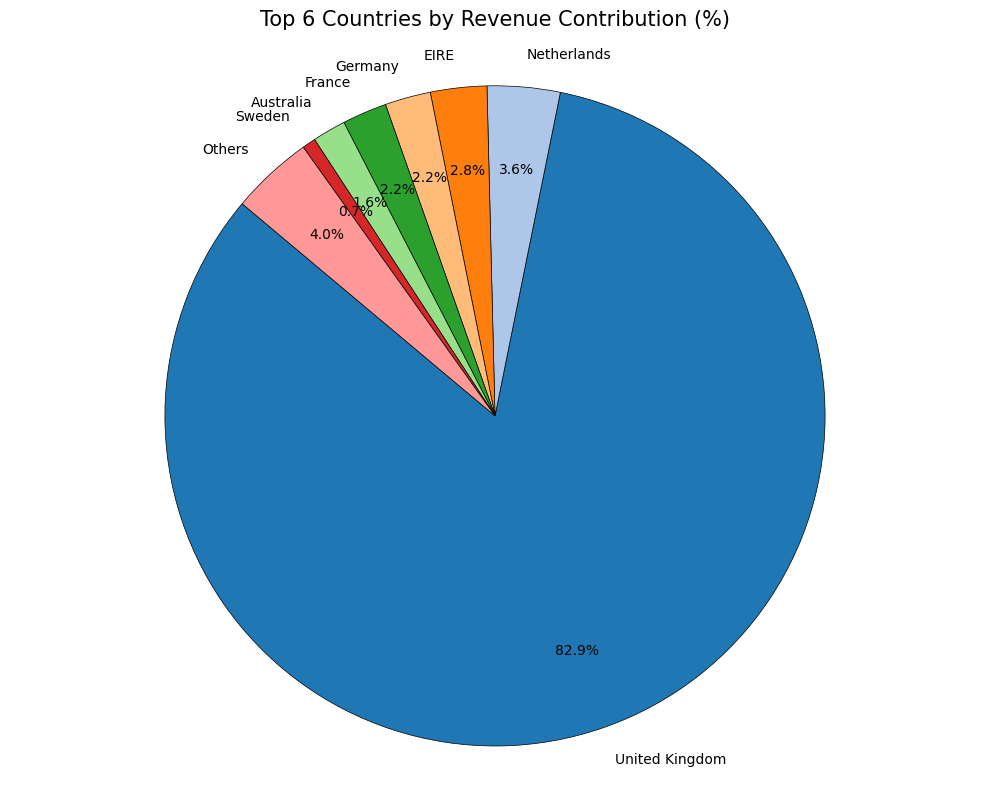

Top 6 Countries + Others:
      CountryName   TotalMoney
0  United Kingdom  49994030.17
1     Netherlands   2147811.39
2            EIRE   1660645.07
3         Germany   1350265.40
4          France   1316880.98
5       Australia    988756.35
6          Sweden    396042.61
0          Others   2425592.29


In [ ]:
# Variable to Store
listCountry = df['Country'].unique()
listTotalMoney = []

# Loop to Store Data
for i in listCountry:
    totalMoney = round(df['TotalMoney'].loc[df['Country'] == i].sum(), 2)
    listTotalMoney.append(totalMoney)

# Dictionary for DataFrame
dictCountry = {
    'CountryName': listCountry,
    'TotalMoney': listTotalMoney
}

# Adjust DataFrame
dfCountry = pd.DataFrame(dictCountry)
dfCountry = dfCountry.sort_values('TotalMoney', ascending=False).reset_index(drop=True)

# Keep top 6 countries, group the rest into "Others"
top6 = dfCountry.head(7)
others = pd.DataFrame({
    'CountryName': ['Others'],
    'TotalMoney': [dfCountry['TotalMoney'][7:].sum()]
})
dfCountryFinal = pd.concat([top6, others])

# Create Pie Chart
plt.figure(figsize=(10, 8))
colors = plt.cm.tab20.colors  # Different colors for each slice

# Plot the pie chart with adjusted label positions
wedges, texts, autotexts = plt.pie(
    dfCountryFinal['TotalMoney'],
    labels=dfCountryFinal['CountryName'],
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor': 'black', 'linewidth': 0.5},
    textprops={'fontsize': 10},
    pctdistance=0.75,  # Move percentage labels closer to center (0.5 = halfway)
    labeldistance=1.1,  # Adjust country label distance from center
)

# Tilt percentage labels toward center (adjust rotation)
for autotext in autotexts:
    autotext.set_rotation_mode('anchor')  # Smooth rotation
    autotext.set_ha('center')  # Horizontal alignment
    autotext.set_va('center')  # Vertical alignment

plt.title('Top 6 Countries by Revenue Contribution (%)', pad=20, fontsize=15)
plt.axis('equal')
plt.tight_layout()
plt.show()

# Show the breakdown (optional)
print("Top 6 Countries + Others:")
print(dfCountryFinal)

##### Total Money Every Months in 2019

c:\Users\Nitro 5\anaconda3\envs\main\Lib\site-packages\matplotlib\text.py:763: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(y))
c:\Users\Nitro 5\anaconda3\envs\main\Lib\site-packages\matplotlib\text.py:906: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(self._y))


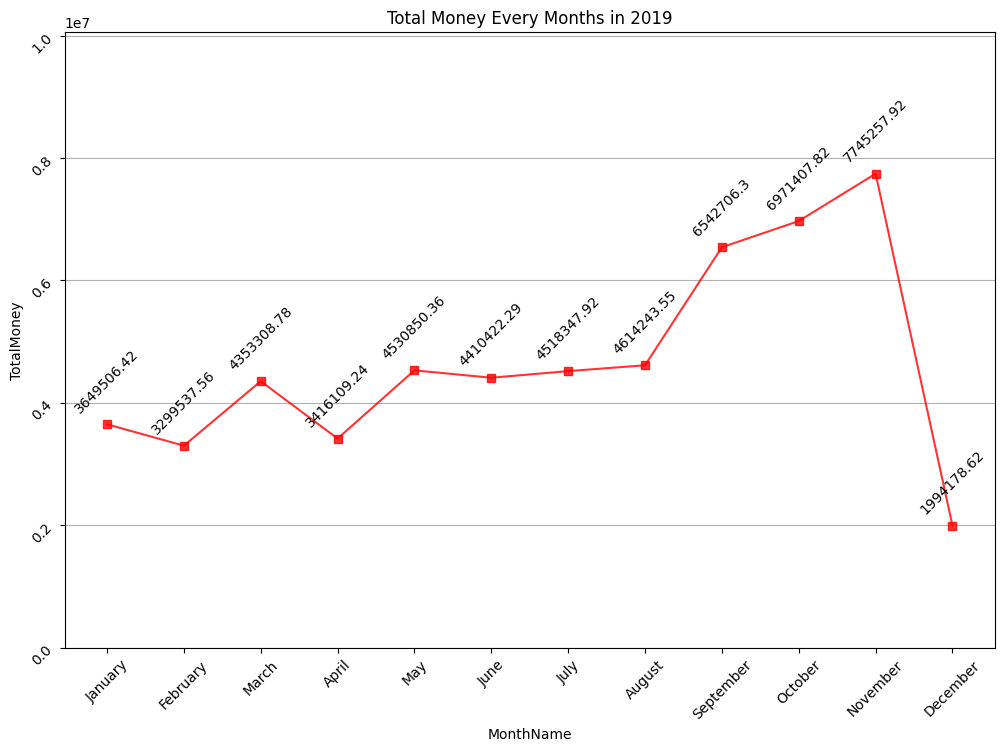

In [ ]:
# Variable to Store
listMonth = []
listTotalMoney = []
for i in df['Month'].unique():
    monthName = dt.datetime.strptime(str(i), "%m")
    monthName = monthName.strftime("%B")
    listMonth.append(monthName)
for i in df['Month'].unique():
    totalMoney = round(df['TotalMoney'].loc[(df['Month']==i)&(df['Year']==2019)].sum(),2)
    listTotalMoney.append(totalMoney)
    
# Dictionary for DataFrame
dictMonth = {
    'MonthName' : listMonth,
    'TotalMoney' : listTotalMoney
}

# Adjust Data Frame
dfMonth = pd.DataFrame(dictMonth)
dfMonth = dfMonth.iloc[::-1]


# Create Figure
plt.figure(figsize = (12,8))
plt.plot(dfMonth['MonthName'], dfMonth['TotalMoney'], color = 'Red', marker = 's',alpha = 0.8)
plt.title('Total Money Every Months in 2019')
plt.yticks(rotation = 45)
plt.xticks(rotation = 45)
plt.xlabel('MonthName')
plt.ylabel('TotalMoney')
for i in dfMonth['MonthName']: 
    text = str(dfMonth['TotalMoney'].loc[dfMonth['MonthName'] == i].values[0])
    y = dfMonth['TotalMoney'].loc[dfMonth['MonthName'] == i]+(dfMonth['TotalMoney'].min()*0.1)
    plt.text(i,y,text, ha = 'center', rotation = 45) 
plt.ylim(0,dfMonth['TotalMoney'].max()*1.3)
plt.grid(axis = 'y')
plt.show()

##### Country that Gives Highest Total Money from Each Month

In [ ]:
def searchTotalMoney(country,month):
    return round(df['TotalMoney'].loc[(df['Country'] == country)&(df['Month'] == month)].sum(),2)

def searchHighestTotalMoneyCountry(month):
    listMoney = []
    maxCountry = 'none'
    for i in listCountry:
        total = searchTotalMoney(i,month)
        listMoney.append(total)
        maxMoney = max(listMoney) 
        if total >= maxMoney:
            maxCountry = i 
    return([maxMoney,maxCountry])

listTotalMoney = []
listHighCountry = []

for i in df['Month'].unique():
    templist = searchHighestTotalMoneyCountry(i)
    listTotalMoney.append(templist[0])
    listHighCountry.append(templist[1])

dictHighCountMonth = {
    'Month' : listMonth,
    'Country Name' : listHighCountry,
    'Total Money' : listTotalMoney
}             

dfCountMonth = pd.DataFrame(dictHighCountMonth)
dfCountMonth = dfCountMonth.iloc[::-1]
dfCountMonth = dfCountMonth.reset_index(drop = True)
dfCountMonth


,Month,Country Name,Total Money
0,January,United Kingdom,2766521.62
1,February,United Kingdom,2704022.15
2,March,United Kingdom,3537492.90
3,April,United Kingdom,3053768.60
4,May,United Kingdom,3689507.59
5,June,United Kingdom,3500065.77
6,July,United Kingdom,3765557.98
7,August,United Kingdom,3667938.41
8,September,United Kingdom,5480320.68
9,October,United Kingdom,5632406.43


##### Total Money each Month that is Received from Top 10 Products that Give Highest Total MOney in 2019

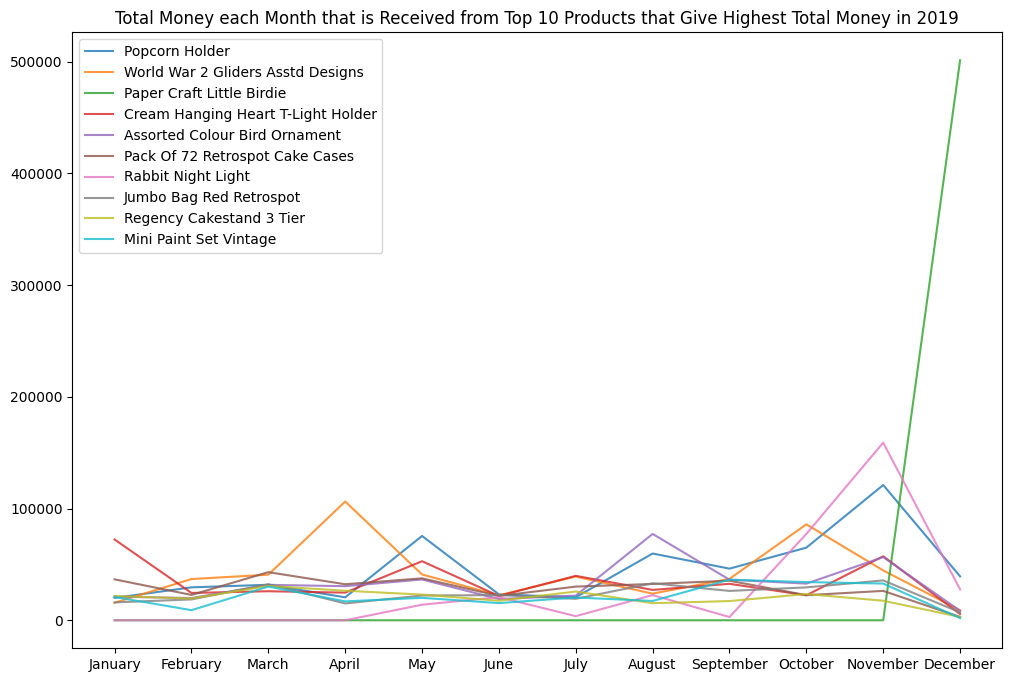

In [ ]:
topTenCountry = dfCountry['CountryName'].unique().copy()
listMonthTopTen = listMonth.reverse()
listMonthTopTen = listMonth

plt.figure(figsize = (12,8))
listProductNo = dfProduct['ProductNo'].unique().copy()  
listProductName = dfProduct['ProductName'].unique().copy()

for i in listProductNo:
    totalMoneyCountry = []
    for j in df['Month'].unique():
        moenyCountry = round(df['TotalMoney'].loc[(df['ProductNo']==i)&((df['Month']==j)&(df['Year']==2019))].sum(),2)
        totalMoneyCountry.append(moenyCountry)
    totalMoneyCountry.reverse()
    plt.plot(listMonthTopTen, totalMoneyCountry,alpha = 0.8) 

plt.title('Total Money each Month that is Received from Top 10 Products that Give Highest Total Money in 2019')
plt.legend(listProductName)
plt.show()

##### Total Quantity each Month from Top 10 Products that Give Highest Total MOney in 2019

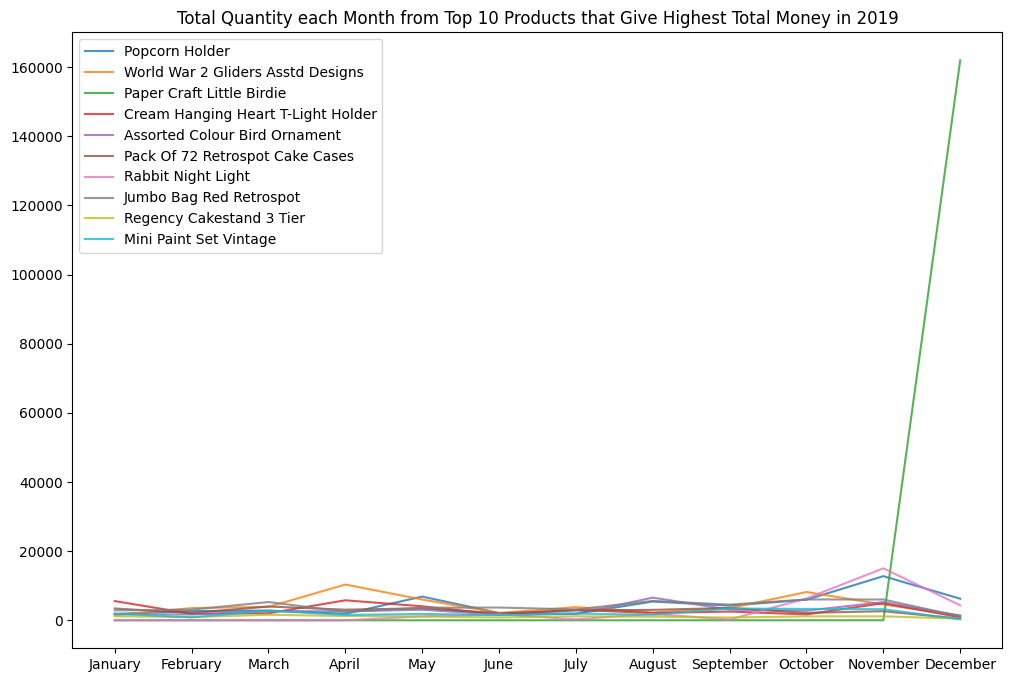

In [ ]:
plt.figure(figsize = (12,8))
listProductNo = dfProduct['ProductNo'].unique().copy()  
listProductName = dfProduct['ProductName'].unique().copy()

for i in listProductNo:
    totalMoneyCountry = []
    for j in df['Month'].unique():
        moenyCountry = round(df['Quantity'].loc[(df['ProductNo']==i)&((df['Month']==j)&(df['Year']==2019))].sum(),2)
        totalMoneyCountry.append(moenyCountry)
    totalMoneyCountry.reverse()
    plt.plot(listMonthTopTen, totalMoneyCountry,alpha = 0.8) 

plt.title('Total Quantity each Month from Top 10 Products that Give Highest Total Money in 2019')
plt.legend(listProductName)
plt.show()

### Revenue Prediction
**Goal**: Predict future revenue based on historical data.